In [24]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(42)
m=20
X = 3*np.random.rand(m,1)
y = 1 + 0.5 * X + np.random.randn(m,1) / 1.5

x_new = np.linspace(0,3, 100).reshape(100,1)


In [25]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[1.5507201]])

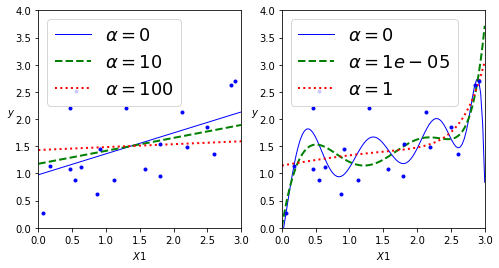

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

def plot_model(model_class, polynomial, alphas, **model_kargs):

  for alpha, style in zip(alphas, ("b-", "g--", "r:")):


    model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
    if polynomial:
      model = Pipeline(
          [
           ("poly_features",  PolynomialFeatures(degree=10, include_bias=False)),
           ("std_scaler", StandardScaler()), 
           ("model", model),
          ]
      )

    model.fit(X,y)
    y_new_regul = model.predict(x_new)
    lw = 2 if alpha > 0 else 1 
    plt.plot(x_new,y_new_regul, style, linewidth=lw, label=rf"$\alpha = {alpha}$")

  plt.plot(X, y, "b.", linewidth=3)
  plt.axis([0,3,0,4])
  plt.xlabel("$X1$")
  plt.ylabel("$y$",rotation=0)
  plt.legend(loc="upper left", fontsize=18)

    
plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100))
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1))



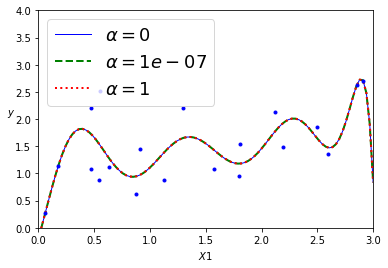

In [46]:
from sklearn.linear_model import Lasso
plot_model(LinearRegression, polynomial=True, alphas=(0, 10**-7, 1))